Importing Libraries

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [101]:
data = pd.read_csv('ds_dataset.csv', )
data.head()

,First Name,Last Name,City,State,Zip Code,DOB [DD/MM/YYYY],Age,Gender,Email Address,Contact Number,...,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile,How Did You Hear About This Internship?,label
0,Barron,Harnes,Kolhapur,Maharashtra,416004,24-09-2000,19,Male,bharnes0@harvard.edu,6345186600,...,HTML/CSS,Yes,No,NaN,6,10,NaN,NaN,Twitter,ineligible
1,Velma,Allone,Pune,Maharashtra,411011,23-10-1997,22,Female,vallone1@i2i.jp,2808753102,...,PHP,No,Yes,NaN,10,7,NaN,NaN,Ex/Current Employee,eligible
2,Thibaut,Scotland,Mumbai,Maharashtra,400059,06-02-1996,24,Male,tscotland2@opensource.org,2945231918,...,C,No,No,NaN,8,6,NaN,NaN,Twitter,ineligible
3,Retha,Proud,Solapur,Maharashtra,413224,26-12-1999,20,Female,rproud3@flavors.me,7507196200,...,PHP,No,Yes,NaN,9,6,NaN,NaN,Twitter,ineligible
4,Del,Pearse,Sangli,Maharashtra,416436,21-09-1996,23,Female,dpearse4@sakura.ne.jp,6643884281,...,Python,No,Yes,NaN,8,6,NaN,NaN,Facebook,ineligible


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
First Name                                                   10000 non-null object
Last Name                                                    10000 non-null object
City                                                         10000 non-null object
State                                                        10000 non-null object
Zip Code                                                     10000 non-null int64
DOB [DD/MM/YYYY]                                             10000 non-null object
Age                                                          10000 non-null int64
Gender                                                       10000 non-null object
Email Address                                                10000 non-null object
Contact Number                                               10000 non-null int64
Emergency Contact Number                                     1000

In [4]:
data['Name'] = data['First Name'] + data['Last Name']

In [5]:
data.drop(['First Name', 'Last Name'], axis=1, inplace=True)

In [6]:
data.describe()

,Zip Code,Age,Contact Number,Emergency Contact Number,CGPA/ percentage,Expected Graduation-year,Certifications/Achievement/ Research papers,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],Link to updated Resume (Google/ One Drive link preferred),link to Linkedin profile
count,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,0.0,10000.000000,10000.000000,0.0,0.0
mean,410087.514700,21.384700,5.521004e+09,5.569675e+09,8.500260,2021.509300,NaN,7.988400,7.995500,NaN,NaN
std,6408.897346,1.489674,2.622215e+09,2.581596e+09,0.860161,1.116888,NaN,1.413529,1.419113,NaN,NaN
min,400012.000000,19.000000,6.402026e+06,1.001359e+09,7.000000,2020.000000,NaN,6.000000,6.000000,NaN,NaN
25%,400701.000000,20.000000,3.191651e+09,3.353914e+09,7.750000,2021.000000,NaN,7.000000,7.000000,NaN,NaN
50%,413001.000000,21.000000,5.543699e+09,5.634072e+09,8.500000,2022.000000,NaN,8.000000,8.000000,NaN,NaN
75%,416004.000000,23.000000,7.796677e+09,7.794617e+09,9.232500,2023.000000,NaN,9.000000,9.000000,NaN,NaN
max,416436.000000,24.000000,9.999767e+09,9.999852e+09,10.000000,2023.000000,NaN,10.000000,10.000000,NaN,NaN


Dropped Clomuns Containg Null Values

In [7]:
data.drop(['Certifications/Achievement/ Research papers','Link to updated Resume (Google/ One Drive link preferred)', 'link to Linkedin profile','State','DOB [DD/MM/YYYY]', 'Email Address','Contact Number', 'Emergency Contact Number'], axis=1, inplace=True)

In [8]:
data.isnull().sum()

City                                                      0
Zip Code                                                  0
Age                                                       0
Gender                                                    0
College name                                              0
University Name                                           0
Degree                                                    0
Major/Area of Study                                       0
Course Type                                               0
Which-year are you studying in?                           0
CGPA/ percentage                                          0
Expected Graduation-year                                  0
Areas of interest                                         0
Current Employment Status                                 0
Have you worked core Java                                 0
Programming Language Known other than Java (one major)    0
Have you worked on MySQL or Oracle datab

In [55]:
# Seperating continuous variables and categorical variables
data_con = data.select_dtypes(include=np.number)
data_cat = data.select_dtypes(exclude=np.number)

In [56]:
skewness = pd.DataFrame(data={'name':list(data_con),'skew':skew(data_con)})
skewness

,name,skew
0,Zip Code,-0.698174
1,Age,0.037070
2,CGPA/ percentage,-0.000044
3,Expected Graduation-year,-0.016206
4,Rate your written communication skills [1-10],0.016689
5,Rate your verbal communication skills [1-10],0.000170


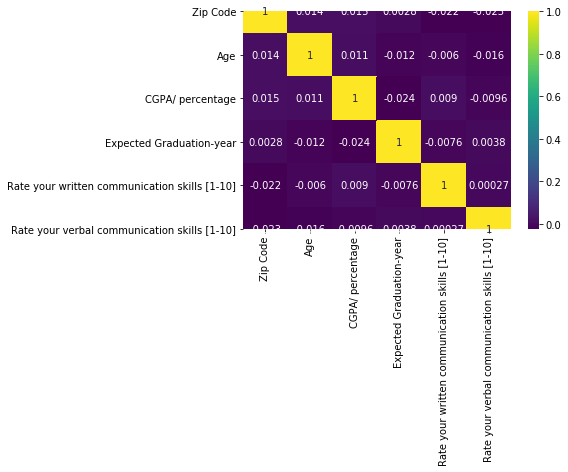

In [57]:
sns.heatmap(data_con.corr(),cmap='viridis',annot=True)

In [63]:
data_con.head()

,Zip Code,Age,CGPA/ percentage,Expected Graduation-year,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10]
0,416004,19,7.26,2022,6,10
1,411011,22,8.73,2020,10,7
2,400059,24,8.61,2020,8,6
3,413224,20,7.96,2022,9,6
4,416436,23,7.07,2023,8,6


In [58]:
le = LabelEncoder()
for col in data_cat:
    data_cat[col] = le.fit_transform(data_cat[col])
     

data_cat.head()

,City,Gender,College name,University Name,Degree,Major/Area of Study,Course Type,Which-year are you studying in?,Areas of interest,Current Employment Status,Have you worked core Java,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,How Did You Hear About This Internship?,label,Name
0,0,1,5,3,1,1,0,2,0,0,1,4,1,0,8,1,939
1,3,0,22,2,1,2,0,1,3,0,1,6,0,1,1,0,9436
2,1,1,21,0,0,1,0,1,9,0,1,1,0,0,8,1,9097
3,5,0,3,1,1,0,0,2,7,0,0,6,0,1,8,1,7980
4,4,0,12,3,1,1,0,0,3,0,0,7,0,1,2,1,2544


In [64]:
data1 = pd.concat([data_con, data_cat],axis=1,ignore_index=True)
data1.columns = ['Zip Code','Age','CGPA/percentage','Expected Graduation-year','Rate your written communication skills [1-10]','Rate your verbal communication skills [1-10]','City','Gender','College name','University Name','Degree','Major/Area of Study','Course Type','Which-year are you studying in?','Areas of interest','Current Employment Status','Have you worked core Java','Programming Language Known other than Java (one major)','Have you worked on MySQL or Oracle database','Have you studied OOP Concepts','How Did You Hear About This Internship?','label','Name']

In [66]:
data1.head()

,Zip Code,Age,CGPA/percentage,Expected Graduation-year,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],City,Gender,College name,University Name,...,Which-year are you studying in?,Areas of interest,Current Employment Status,Have you worked core Java,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,How Did You Hear About This Internship?,label,Name
0,416004,19,7.26,2022,6,10,0,1,5,3,...,2,0,0,1,4,1,0,8,1,939
1,411011,22,8.73,2020,10,7,3,0,22,2,...,1,3,0,1,6,0,1,1,0,9436
2,400059,24,8.61,2020,8,6,1,1,21,0,...,1,9,0,1,1,0,0,8,1,9097
3,413224,20,7.96,2022,9,6,5,0,3,1,...,2,7,0,0,6,0,1,8,1,7980
4,416436,23,7.07,2023,8,6,4,0,12,3,...,0,3,0,0,7,0,1,2,1,2544


In [78]:
columns = list(data1)

In [76]:
X = data1.iloc[:,:-1]
y = data1.iloc[:,-1]


In [81]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [82]:
X = pd.DataFrame(X,columns=columns[:-1])

In [83]:
X.head()

,Zip Code,Age,CGPA/percentage,Expected Graduation-year,Rate your written communication skills [1-10],Rate your verbal communication skills [1-10],City,Gender,College name,University Name,...,Major/Area of Study,Course Type,Which-year are you studying in?,Areas of interest,Current Employment Status,Have you worked core Java,Programming Language Known other than Java (one major),Have you worked on MySQL or Oracle database,Have you studied OOP Concepts,How Did You Hear About This Internship?
0,0.923214,-1.600900,-1.441964,0.439368,-1.406762,1.412573,-1.471369,1.003607,-0.822271,1.197454,...,0.497383,0.0,0.451232,-1.642537,0.0,1.006219,0.231551,0.998601,-1.008839,1.531759
1,0.144101,0.413064,0.267103,-1.351412,1.423176,-0.701530,0.282000,-0.996406,1.676809,0.401539,...,1.748660,0.0,-0.445137,-0.989579,0.0,1.006219,1.105164,-1.001401,0.991238,-1.185847
2,-1.564858,1.755707,0.127587,-1.351412,0.008207,-1.406231,-0.886912,1.003607,1.529804,-1.190291,...,0.497383,0.0,-0.445137,0.316336,0.0,1.006219,-1.078868,-1.001401,-1.008839,1.531759
3,0.489420,-0.929579,-0.628123,0.439368,0.715691,-1.406231,1.450913,-0.996406,-1.116280,-0.394376,...,-0.753895,0.0,0.451232,-0.118969,0.0,-0.993819,1.105164,-1.001401,0.991238,1.531759
4,0.990623,1.084386,-1.662864,1.334758,0.008207,-1.406231,0.866456,-0.996406,0.206762,1.197454,...,0.497383,0.0,-1.341507,-0.989579,0.0,-0.993819,1.541970,-1.001401,0.991238,-0.797617


In [84]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=42,test_size=0.2)

In [125]:
X_Cols = list(X_train)

In [85]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_valid)

In [86]:
print('Accuracy is {}'.format(accuracy_score(y_valid,y_pred)))
print('F1-score is {}'.format(f1_score(y_valid,y_pred)))
print('Confusion Matrix is')
print()
print((confusion_matrix(y_valid,y_pred)))

Accuracy is 0.803
F1-score is 0.8385245901639343
Confusion Matrix is

[[ 583  207]
 [ 187 1023]]


In [99]:
# Apply PCA and fit the logistic model on train data use df dataset
nof_list=[5,8,10,12,14,15]
high_score=0
nof=0

for n in nof_list:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    logistic = LogisticRegression(solver = 'lbfgs')
    logistic.fit(X_train, y_train)
    print("For no of features=",n,", score=", logistic.score(X_test,y_test))
    
    if logistic.score(X_test,y_test)>high_score:
        high_score=logistic.score(X_test,y_test)
        nof=n 
print("High Score is:",high_score, "with features=",nof)


For no of features= 5 , score= 0.6396666666666667
For no of features= 8 , score= 0.7196666666666667
For no of features= 10 , score= 0.7776666666666666
For no of features= 12 , score= 0.7866666666666666
For no of features= 14 , score= 0.7883333333333333
For no of features= 15 , score= 0.8066666666666666
High Score is: 0.8066666666666666 with features= 15


In [103]:
dt = DecisionTreeClassifier(random_state =42,max_depth=3)

# Fit the model on train data
dt.fit(X_train,y_train)

# accuracy
accuracy = dt.score(X_test,y_test)

# Predicted values for test data
y_pred_dt = dt.predict(X_test)


print('Accuracy score is ',accuracy_score(y_test,y_pred_dt))
print()
print(classification_report(y_test,y_pred_dt))

Accuracy score is  0.7676666666666667

              precision    recall  f1-score   support

           0       0.66      0.85      0.75      1207
           1       0.88      0.71      0.78      1793

    accuracy                           0.77      3000
   macro avg       0.77      0.78      0.77      3000
weighted avg       0.79      0.77      0.77      3000



In [104]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForrest model to variable rfc
rfc = RandomForestClassifier(criterion='gini', max_depth= 6,max_features= 'auto',n_estimators= 11)

# Fit the model
rfc.fit(X_train,y_train)

# Store the predicted values of test data
y_pred_rf = rfc.predict(X_test)

# accuracy
accuracy = rfc.score(X_test,y_test)


print('Accuracy is ', accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Accuracy is  0.8306666666666667
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1207
           1       0.86      0.86      0.86      1793

    accuracy                           0.83      3000
   macro avg       0.82      0.82      0.82      3000
weighted avg       0.83      0.83      0.83      3000



In [112]:
rfc = RandomForestClassifier(random_state=42)
param_grid = { 
'n_estimators': [19],
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [15,16,17,18,19,20],
'criterion' :['gini', 'entropy']
}
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
grid_search_model.fit(X_train, y_train)

grid_search_model.best_params_

{'criterion': 'entropy',
 'max_depth': 16,
 'max_features': 'auto',
 'n_estimators': 19}

In [113]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForrest model to variable rfc
rfc = RandomForestClassifier(random_state=42, criterion='entropy', max_depth= 16,
max_features= 'auto',
n_estimators= 19)

# Fit the model
rfc.fit(X_train,y_train)

# Store the predicted values of test data
y_pred_rf = rfc.predict(X_test)

# accuracy
accuracy = rfc.score(X_test,y_test)

print('Accuracy is ', accuracy_score(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Accuracy is  0.8583333333333333
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1207
           1       0.89      0.87      0.88      1793

    accuracy                           0.86      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.86      0.86      0.86      3000



In [135]:
XGB = XGBClassifier(random_state=0)

XGB.fit(X_train,y_train)
y_pred = XGB.predict(X_test)

accuracy_score(y_test,y_pred)

0.8673333333333333

In [143]:
gbm_param_grid = {
     'colsample_bytree': np.linspace(0.9,2),
     'n_estimators':[22,50,100],
     'max_depth': [15]
}

grid_mse = GridSearchCV(estimator = XGB, param_grid = gbm_param_grid, scoring = 'accuracy', cv = 5)
grid_mse.fit(X_train, y_train)
print("Best parameters found: ",grid_mse.best_params_)
print("Highest Accuracy found: ", grid_mse.best_score_)

Best parameters found:  {'colsample_bytree': 0.9, 'max_depth': 15, 'n_estimators': 100}
Highest Accuracy found:  0.89


In [144]:
pred = grid_mse.predict(X_test)
accuracy_score(y_test,pred)

0.899

In [160]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', gamma ='auto')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.946


In [156]:
kernels = ['Polynomial', 'RBF', 'Sigmoid','Linear']
#A function which returns the corresponding SVC model
def getClassifier(ktype):
    if ktype == 0:
        # Polynomial kernal
        return SVC(kernel='poly', degree=8, gamma="auto")
    elif ktype == 1:
        # Radial Basis Function kernal
        return SVC(kernel='rbf', gamma="auto")
    elif ktype == 2:
        # Sigmoid kernal
        return SVC(kernel='sigmoid', gamma="auto")
    elif ktype == 3:
        # Linear kernal
        return SVC(kernel='linear', gamma="auto")

In [159]:
for i in range(4):
    # Separate data into test and training sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
# Train a SVC model using different kernal
    svclassifier = getClassifier(i) 
    svclassifier.fit(X_train, y_train)
# Make prediction
    y_pred = svclassifier.predict(X_test)
# Evaluate our model
    print("Evaluation:", kernels[i])
    print(accuracy_score(y_test,y_pred))

Evaluation: Polynomial
0.7865
Evaluation: RBF
0.961
Evaluation: Sigmoid
0.7685
Evaluation: Linear
0.8075


In [178]:
param_grid = {'C': [100], 'gamma': [0.01,0.1],'kernel': ['rbf']}

In [179]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] C=100, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.9s
[CV] C=100, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.9s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.9s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.9s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] .................... C=100, gamma=0.01, kernel=rbf, total=   0.9s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   1.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   1.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=100, gamma=0.1, kernel=rbf, total=   1.1s
[CV] C=100, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100], 'gamma': [0.01, 0.1], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [180]:
print(grid.best_estimator_)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [181]:
grid_predictions = grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))

0.967
